In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  

In [24]:
df1=pd.read_csv("C:\\Users\\Administrator\\Downloads\\train.csv",names=['Surv','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'],header=0);

In [25]:
df1.head()

,Surv,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [26]:
cols=df1.shape[1]

In [14]:
X=df1.iloc[:,1:cols]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [7]:
Y=df1.iloc[:,0]
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
from sklearn import svm  
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)

In [9]:
ou1=svc.fit(X,Y)

In [15]:
ndTest=np.matrix([[3,0,34.5,0,0,7.8292,2],[3,1,47,1,0,7,0]])



In [16]:
cTest=ou1.predict(ndTest)

In [17]:
cTest

array([0, 1], dtype=int64)

In [33]:
X1=df1.iloc[:,[3,6]]
X1.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [34]:
svc1 = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)

In [35]:
ou2=svc1.fit(X1,Y)

In [39]:
h = .02 #step size
x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
y_min, y_max = X['Fare'].min() - 1, X['Fare'].max() + 1

In [40]:
y_min=y_min/10 # range of fare is too large to plot so reduced the values
y_max=y_max/10

In [41]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


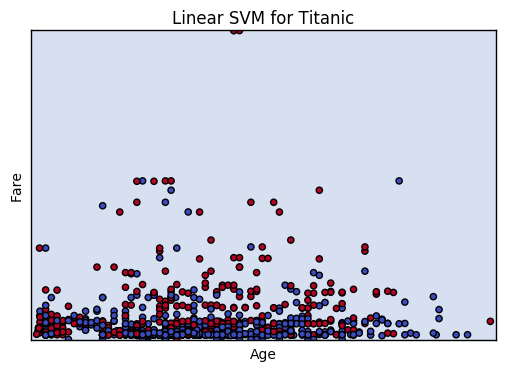

In [48]:
plt.subplot(1,1,1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = ou2.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
plt.scatter(X['Age'], X['Fare']/10, c=Y, cmap=plt.cm.coolwarm)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Linear SVM for Titanic')

plt.show()

In [43]:
ndTest=np.matrix([[34.5,7.8292],[47,7]])

In [44]:
cTest=ou2.predict(ndTest)

In [45]:
cTest

array([0, 0], dtype=int64)

In [50]:
X1=df1.iloc[:,[2,3]]
X1.head()
svc1 = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
ou2=svc1.fit(X1,Y)

In [51]:
h = .02 #step size
x_min, x_max = X['Sex'].min() - 1, X['Sex'].max() + 1
y_min, y_max = X['Age'].min() - 1, X['Age'].max() + 1

In [52]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


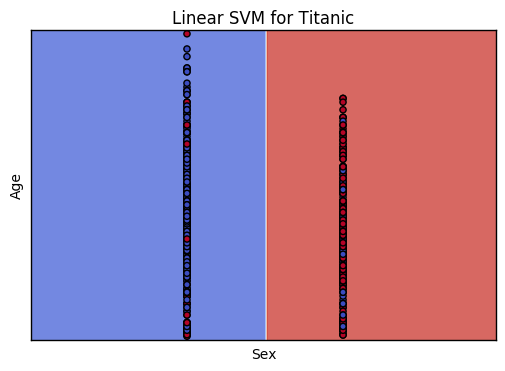

In [54]:
plt.subplot(1,1,1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = ou2.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
plt.scatter(X['Sex'], X['Age'], c=Y, cmap=plt.cm.coolwarm)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Linear SVM for Titanic')

plt.show()

In [55]:
ndTest=np.matrix([[0,34.5],[1,47]])

In [57]:
cTest=ou2.predict(ndTest)
cTest

array([0, 1], dtype=int64)